## Survival Analysis Homework

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import WeibullAFTFitter as wf_aft
from lifelines import LogNormalAFTFitter as lnf_aft
from lifelines import LogLogisticAFTFitter as llf_aft

In [2]:
df = pd.read_csv('telco.csv')
df.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [3]:
#changing churn into binary values
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

In [4]:
#encoding categorical variables and turning them into dummies
encode_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']

In [5]:
survival_df = pd.get_dummies(df,
               columns=encode_cols,
               prefix=encode_cols,
               drop_first=True)

In [6]:
#The models only work for positive values, so we need to change the zeros in tenure column.
survival_df["tenure"] = np.where(survival_df["tenure"] == 0, 0.0000001, survival_df["tenure"])
survival_df.head()

,ID,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,...,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,1,13.0,44,9,64,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,11.0,33,7,136,1,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
2,3,68.0,52,24,116,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4,33.0,33,12,33,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,23.0,30,9,30,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0


### Building  AFT models

Model: WeibullAFTFitter
                                             coef  exp(coef)  se(coef)  \
param   covariate                                                        
lambda_ ID                              -0.000514   0.999486  0.000182   
        address                          0.041965   1.042858  0.008765   
        age                              0.028338   1.028743  0.006734   
        custcat_E-service                0.981685   2.668950  0.154014   
        custcat_Plus service             0.735620   2.086776  0.192220   
        custcat_Total service            0.962885   2.619243  0.212317   
        ed_Did not complete high school  0.463497   1.589623  0.193139   
        ed_High school degree            0.294820   1.342885  0.144773   
        ed_Post-undergraduate degree     0.176300   1.192796  0.189922   
        ed_Some college                  0.252504   1.287245  0.143347   
        forward_Yes                     -0.089337   0.914537  0.148469   
        gender

Model: LogNormalAFTFitter
                                            coef  exp(coef)  se(coef)  \
param  covariate                                                        
mu_    ID                              -0.000474   0.999526  0.000198   
       address                          0.042630   1.043551  0.008880   
       age                              0.033230   1.033788  0.007241   
       custcat_E-service                1.064673   2.899891  0.169648   
       custcat_Plus service             0.937889   2.554584  0.215175   
       custcat_Total service            1.210374   3.354739  0.249688   
       ed_Did not complete high school  0.376412   1.457047  0.200659   
       ed_High school degree            0.306672   1.358895  0.162321   
       ed_Post-undergraduate degree    -0.053980   0.947451  0.222322   
       ed_Some college                  0.285017   1.329785  0.164680   
       forward_Yes                     -0.203822   0.815608  0.179371   
       gender_Male       

Model: LogLogisticAFTFitter
                                            coef  exp(coef)  se(coef)  \
param  covariate                                                        
alpha_ ID                              -0.000466   0.999535  0.000191   
       address                          0.039359   1.040144  0.008782   
       age                              0.032634   1.033172  0.006890   
       custcat_E-service                1.045089   2.843652  0.164304   
       custcat_Plus service             0.873058   2.394220  0.208542   
       custcat_Total service            1.202327   3.327851  0.240200   
       ed_Did not complete high school  0.446926   1.563498  0.198554   
       ed_High school degree            0.318642   1.375259  0.153536   
       ed_Post-undergraduate degree    -0.056649   0.944926  0.213360   
       ed_Some college                  0.251714   1.286229  0.154643   
       forward_Yes                     -0.195962   0.822043  0.169892   
       gender_Male     

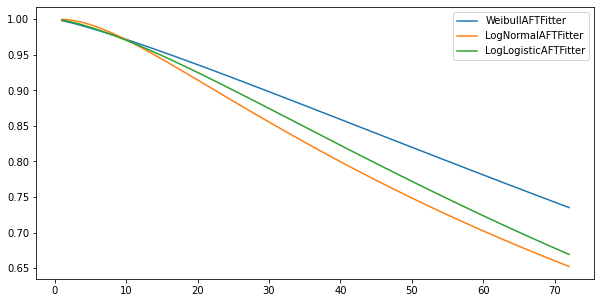

In [7]:
wf = wf_aft()
lnf = lnf_aft()
llf = llf_aft()

fig, ax = plt.subplots(figsize=(10, 5))

list_labels = ["WeibullAFTFitter", "LogNormalAFTFitter", "LogLogisticAFTFitter"]
i = 0

for model in [wf, lnf, llf]:
    try:
        model.fit(survival_df, duration_col="tenure", event_col="churn")
        
        # Print summary
        print(f"Model: {list_labels[i]}")
        print(model.summary)
        print("")

        plt.plot(model.predict_survival_function(survival_df.loc[1]), label=list_labels[i])
        i += 1
    except Exception as e:
        print(f"Caught an error: {e}")
        pass

plt.legend()
plt.show()

#### Weibull AFT Model:
- The lambda_ coefficients represent the baseline hazard. Negative values indicate a decrease in hazard. lambda_ ID has a negative coefficient, suggesting that the baseline hazard decreases with ID.
- The rho_ coefficient represents the shape parameter of the Weibull distribution. A positive coefficient suggests increasing hazard over time (e.g 0.183884).

#### Log-Normal AFT Model:
- mu_ (Location Parameter): Positive coefficients indicate an increase in the location parameter, implying higher hazard (e.g. -0.000474).
- sigma_ (Scale Parameter): Represents the standard deviation of the log-normal distribution. A higher value suggests higher variability in survival times.

#### Log-Logistic AFT Model:
- alpha_ (Shape Parameter): Positive coefficient implies increasing hazard over time, while a negative coefficient suggests decreasing hazard (e.g. -0.000466).
- beta_ (Scale Parameter): Reflects the degree of variability in survival times.


#### 1. "custcat_E-service, custcat_Plus service, and custcat_Total service" have significant positive coefficients in all models, suggesting higher hazard for these customer categories.
#### 2. "income" has a small but positive coefficient in Weibull and log-normal models, indicating a slight increase in hazard with income.

#### 3. From our plot, we can see that LogNormal model has the lowest AIC and BIC, and the highest log-likelihood value. This means that the model fits better than the others to our data. So we choose LogNormal model as our AFT Fitter.

#### 4. The significant features are: address, age, custcat_E-service, custcat_Plus service, custcat_Total service, internet_Yes, marital_Unmarried, voice_Yes according to their p-values

Coefficients:
                                  coef  exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                              
mu_    address                0.042824   1.043754  0.008847        0.025483   
       age                    0.036826   1.037512  0.006400        0.024283   
       custcat_E-service      1.025825   2.789395  0.169047        0.694499   
       custcat_Plus service   0.822553   2.276303  0.169425        0.490485   
       custcat_Total service  1.013269   2.754590  0.209579        0.602501   
       internet_Yes          -0.840528   0.431483  0.138259       -1.111511   
       marital_Unmarried     -0.447317   0.639341  0.114472       -0.671679   
       voice_Yes             -0.463493   0.629082  0.166771       -0.790359   
       Intercept              2.534887  12.615010  0.242611        2.059379   
sigma_ Intercept              0.283034   1.327150  0.046020        0.192836   

                              coef up

<AxesSubplot: xlabel='log(accelerated failure rate) (95% CI)'>

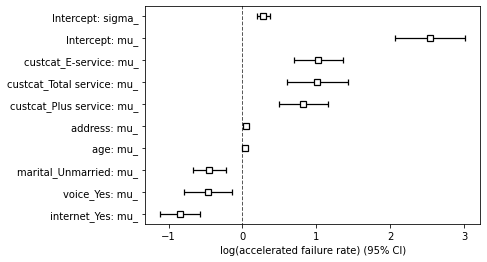

In [14]:
logn = lnf_aft()
logn.fit(survival_df, duration_col='tenure', event_col='churn')

summary_df = logn.summary
coefficients = summary_df[['coef', 'exp(coef)', 'se(coef)', 'coef lower 95%', 'coef upper 95%']]

print("Coefficients:")
print(coefficients)

logn.plot()

### Calculating CLV's

In [15]:
pred = logn.predict_survival_function(survival_df)
pred

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,...,0.999828,0.999961,0.999668,1.000000,0.999781,0.996036,0.995073,0.999991,0.999923,0.999471
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,...,0.998883,0.999699,0.998022,0.999998,0.998622,0.983532,0.980236,0.999915,0.999446,0.997040
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,...,0.997036,0.999113,0.995004,0.999992,0.996407,0.966176,0.960211,0.999724,0.998443,0.992790
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,...,0.994377,0.998186,0.990846,0.999979,0.993269,0.946364,0.937776,0.999396,0.996923,0.987122
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,...,0.991029,0.996934,0.985782,0.999957,0.989366,0.925411,0.914381,0.998926,0.994934,0.980384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.595597,0.612735,0.941530,0.380751,0.681995,0.740246,0.324647,0.244165,0.887519,0.906396,...,0.655478,0.780519,0.588828,0.975035,0.631761,0.300058,0.274774,0.864845,0.727282,0.537869
69.0,0.591329,0.608517,0.940235,0.376567,0.678061,0.736667,0.320700,0.240726,0.885403,0.904544,...,0.651418,0.777252,0.584544,0.974386,0.627607,0.296244,0.271117,0.862440,0.723614,0.533498
70.0,0.587113,0.604347,0.938937,0.372457,0.674164,0.733115,0.316829,0.237363,0.883290,0.902692,...,0.647400,0.774006,0.580311,0.973732,0.623498,0.292507,0.267537,0.860042,0.719976,0.529186
71.0,0.582946,0.600224,0.937635,0.368420,0.670304,0.729590,0.313033,0.234073,0.881180,0.900841,...,0.643423,0.770779,0.576130,0.973074,0.619433,0.288845,0.264031,0.857649,0.716367,0.524932


In [16]:
#keeping only 24 months
pred = pred.loc[1:12, :]
pred = pred.T
pred

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0.999688,0.998129,0.995250,0.991268,0.986400,0.980833,0.974715,0.968166,0.961281,0.954136,0.946795,0.939306
1,0.999736,0.998378,0.995831,0.992267,0.987874,0.982817,0.977228,0.971217,0.964870,0.958260,0.951445,0.944472
2,0.999999,0.999988,0.999956,0.999893,0.999796,0.999659,0.999483,0.999264,0.999004,0.998703,0.998361,0.997978
3,0.997985,0.990703,0.979723,0.966472,0.951860,0.936468,0.920676,0.904736,0.888819,0.873040,0.857480,0.842191
4,0.999870,0.999127,0.997635,0.995448,0.992655,0.989349,0.985608,0.981502,0.977091,0.972424,0.967544,0.962486
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.996036,0.983532,0.966176,0.946364,0.925411,0.904064,0.882762,0.861767,0.841235,0.821255,0.801876,0.783121
996,0.995073,0.980236,0.960211,0.937776,0.914381,0.890812,0.867512,0.844730,0.822606,0.801210,0.780575,0.760706
997,0.999991,0.999915,0.999724,0.999396,0.998926,0.998314,0.997565,0.996685,0.995682,0.994563,0.993337,0.992010
998,0.999923,0.999446,0.998443,0.996923,0.994934,0.992532,0.989769,0.986693,0.983348,0.979769,0.975990,0.972038


In [21]:
#Calculating CLV for each person and adding to the new column of the dataframe

r = 12
monthly_margin = 1300

for col in range(0, len(pred.columns)):
    for row in range(0, 13):
        pred[col + 1][row + 1] = pred[col + 1][row + 1] / (1 + r / 12)**(row)

df['CLV'] = monthly_margin * pred.sum(axis = 0)
df.head(10)

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,1,NaN
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,1,1.281128e+06
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,0,1.272000e+06
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,1,1.260395e+06
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,0,1.247613e+06
5,6,Zone 2,41,39,Unmarried,17,78,High school degree,No,Female,No,No,No,Plus service,0,1.234292e+06
6,7,Zone 3,45,22,Married,2,19,High school degree,No,Female,No,Yes,No,E-service,1,1.220780e+06
7,8,Zone 2,38,35,Unmarried,5,76,High school degree,No,Male,Yes,Yes,Yes,Total service,0,1.207276e+06
8,9,Zone 3,45,59,Married,7,166,College degree,No,Male,No,No,Yes,Plus service,0,1.193898e+06
9,10,Zone 1,68,41,Married,21,72,Did not complete high school,No,Male,No,No,No,E-service,0,1.180720e+06


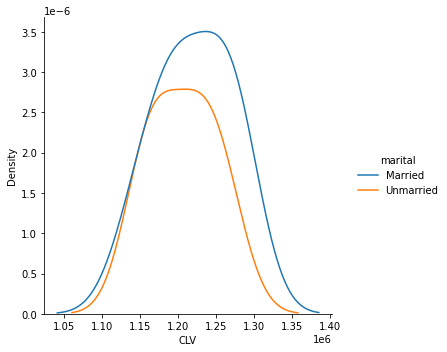

In [18]:
clv = sns.displot(df, x = 'CLV', kind = 'kde', hue = 'marital')

#### Unmarried customers are more likely to survive based on this plot.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


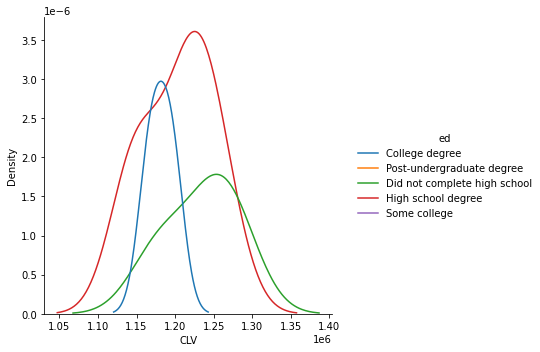

In [19]:
clv = sns.displot(df, x = 'CLV', kind = 'kde', hue = 'ed')

#### Customers without high school completion are more likely survive. (Did not complete high school)

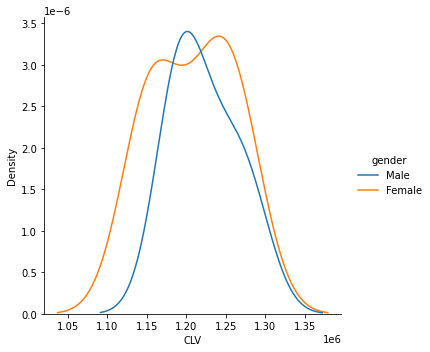

In [20]:
clv = sns.displot(df, x = 'CLV', kind = 'kde', hue = 'gender')

#### Female customers are more likely to survive.